# EE-411 Fundamentals of inference and learning, EPFL 
## Exercise Session 2: optimizing functions using scipy

In this second set of exercises, we will solve the so-called *Lighthouse problem*, which serves as a perfect opportunity to introduce a very useful package for scientific computing, called **scipy**.

**What you will learn today:** In this second session, we will discuss how to use **scipy** to generate random data according to a certain distribution and to minimize 1D and 2D functions. Furthermore, we will have a first-hand application of some concepts explained in the second lecture, such as the maximal likelihood estimator, Cramér–Rao bound and Jeffreys prior.


# The Lighthouse problem 

**Locating the lighthouse**

A lighthouse is located somewhere off a piece of straight coastline at a position $\alpha$ (or $x_0$) along the shore and a distance $\beta$ (or $y_0$) out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. N flashes have so far been recorded at positions $\{x_k\}$. Where is the lighthouse?’ (from D. Sivia's book, "Data Analysis - A Bayesian Tutorial")

[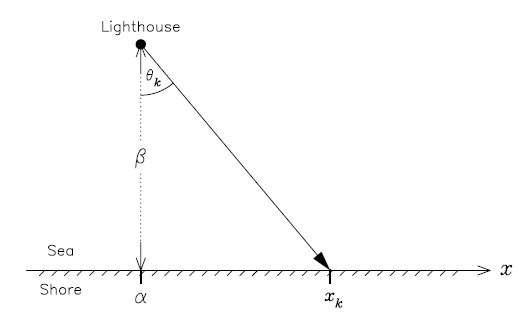](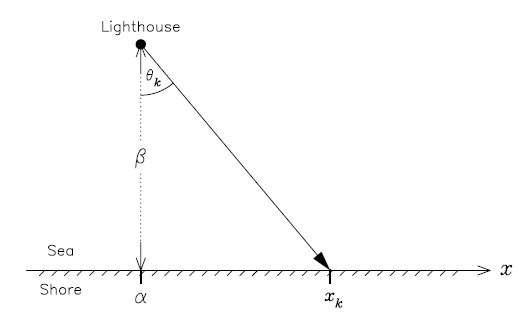)



The density is a Cauchy (Lorentzian) with location $x_0$ and scale $y_0$:

$${p(x\mid x_0,y_0) \,=\, \frac{1}{\pi}\,\frac{y_0}{(x-x_0)^2 + y_0^2}.}$$

It follows from the geometry of rays emitted at uniform angles and mapping to the shoreline via $x = x_0 + y_0 \tan\theta$. Since $\theta$ is uniform, $x$ has the Cauchy law above.


#### 1) Compute the probability distribution $p(x | x_0,y_0)$ of observing a flash at the point $x$ along the shore depending on the distance of the lighthouse from the shore $y_0$ and its position along the shore $x_0$.

#### Recall: Maximum likelihood estimator

Assume that the data comes from a true probability distribution $x \sim P_{\lambda^{\star}}(x) = P(x|\lambda^{\star})$ for some unknown parameter $\lambda^{\star}.$
The maximum likelihood estimator gives us the parameter $\lambda$ of the distribution $P(\cdot|\lambda)$ that make the observation of a given set of data $\{x_i\}$ most likely under the prior distribution $P(x)$. Assuming that the observations are independent, and that the probability of observing $x$ is given by the probability distribution $P(x|\lambda)$
$$
\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)
$$

There are two additional quantities that will be important for our purpose. The first one is called the score
$$
S(x,\lambda)=\partial_\lambda L(x|\lambda),
$$
where we introduce the log-likelihood $L(x|\lambda)=\log P(x|\lambda)$. Importantly, the expectation of the score with respect to $P(x|\lambda)$ is zero, that is, $\mathbb{E}_{\lambda}[S(x,\lambda)]=0$. The second one is the Fisher information, which corresponds to the variance of the score with respect to the parameter $\lambda$:
$$
I(\lambda)=\mathbb{E}_{\lambda}[S(x|\lambda)^2].
$$
In case of $N$ independent events, we simply have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

##### Consider the case with $x_0=20$, $y_0=15$.

##### Let us first assume that we know the value of $x_0$ but not the one of $y_0$. 

Then, we wish to find

$$p(y_0 | \{x_k\}, x_0)$$

Using Bayes’ theorem:

$$p(y_0 | \{x_k\}, x_0) = \frac{p(y_0 , \{x_k\}, x_0)}{p(\{x_k\}, x_0)} = \frac{p(\{x_k\} | y_0, x_0)p(y_0 | x_0)p(x_0)}{p(\{x_k\} | x_0)p(x_0)}\propto p(\{x_k\} | y_0, x_0) p(y_0)$$

where the last step comes from the fact that  $y_0 \perp x_0$, and so we have $p(y_0 | x_0) = p(y_0)$.
The most intuitive prior $p(y_0)$ when we don't have additional information is the one which is uniform over a large enough segment $[y_{min}, y_{max}]$, i.e. $p(y_0) = 1/(y_{max}-y_{min})$

Even if this seems to be a good choice in general, we will show that there exist other priors that lead to a better result.
For the data likelihood $p(\{x_k\} | y_0, x_0)$ we consider that each datum $x_k$ is i.i.d., so:

$$p(\{x_k\} | y_0, x_0) = \prod_{k=1}^N p(x_k | y_0, x_0)$$

And since the prior for $y_0$ is uniform, we finally get:

$$p(y_0 | \{x_k\}, x_0) \propto \prod_{k=1}^N p(x_k | y_0, x_0)$$

Therefore, considering a uniform prior, maximizing the posterior coincides with maximizing the Log-likelihood $L(\{x_k\} | x_0,y_0)$ 

##### We now make an experiment, by generating $N=100$ samples and plotting the dependence of the log-likelihood as a function of $y_0$. 

In [1]:
import numpy as np
np.random.seed(123456) # we set the seed of the random generator

It turns out that the data generating process of the observations $\{x_k\}$ follows a Cauchy distribution with location $x_0$ and scale $y_0^\star$. To generate the set of observations $\{x_k\}$, we can use a built-in function of the `scipy` package.

In [2]:
from scipy.stats import cauchy

N=100
x0_true=20
y0_true=15

x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N) # rvs stands for Random Variates, i.e. particular outcomes of a random variable

Then, let's define the function `loglh` to compute the 
log-likelihood for a set of $N$ instances $x$, given the parameters of the Cauchy distribution $x_0$ and $y_0$.

In [3]:
def loglh(x0,y0,x):
  logl=0
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
  return logl

Finally we can compute the log-likelihood for a range of values of $y_0$ around the true value $y_0^*$ and plot its behaviour.

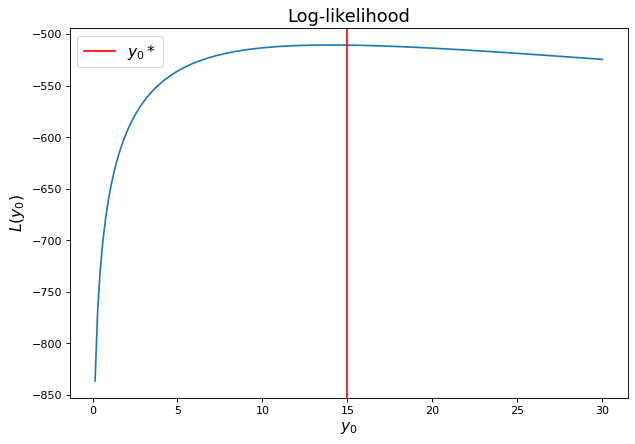

In [4]:
import matplotlib.pyplot as plt

tab_y0=np.linspace(0,30,200)[1:] # we generate a table for y0 
logl_y0=np.array([loglh(x0_true,y0,x) for y0 in tab_y0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$L(y_0)$', fontsize=14)
plt.plot(tab_y0,logl_y0)
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

We see that there’s a maximum near the true value, but it's not easy to see since we are working with logs.

However, if we compute the exponential we can get the shape of the posterior $p(y_0 | \{x_k\}, 20)$ (to get the true posterior – a distribution – we would need to find the normalizing factor, which is irrelevant here)

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\2977674641.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)


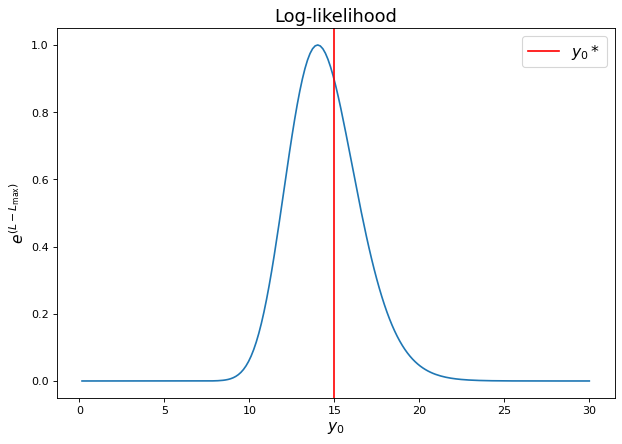

In [5]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_y0,np.exp(logl_y0-max(logl_y0)))
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

##### Now we compute the maximum likelihood estimator for $y_0$, that we call $\widehat{y}_{0,ML}$, and we see how it behaves when we vary the number of data in the sample $\{x_k\}$

A good way to compute the maximum of a function is to use a function from `scipy.optimize` called `minimize`

In [6]:
%%time
from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=10, base=10)
y0_ML=[]
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  y0_guess = np.random.uniform(0,30) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda y0:-loglh(x0_true,y0,x),y0_guess, method='Nelder-Mead')
  y0_ML.append(optimum.x)

CPU times: total: 2.92 s
Wall time: 2.96 s


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\2708132329.py:2: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{y}_{0,ML}$', fontsize=16)


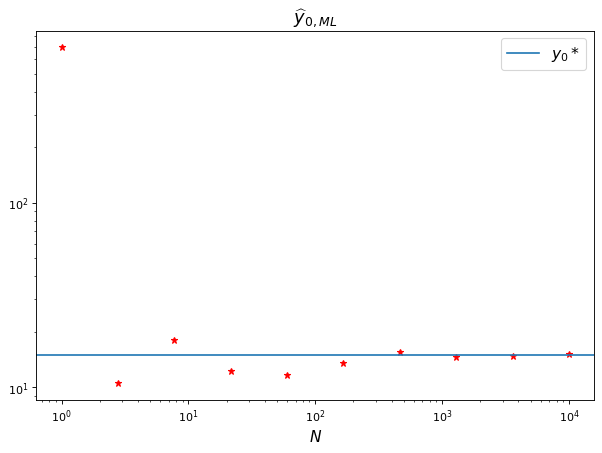

In [7]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{y}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,y0_ML,"*",color='r')
plt.axhline(y0_true, label="$y_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);

#### 2) Now do the same, but in the case in which we know $y_0 = 15$ but we do not know $x_0$, that is again $20$:
* Generate $N=100$ samples Cauchy-distributed according to the same parameters $x_0$ and $y_0$
* Plot  the Log-likelihood for a range of values of $x_0$ around the true value $x_0^*$
* Compute the maximum likelihood estimator for $x_0$ , that we call $\widehat{x}_0$ , and see how it behaves for $N\in[1,10^4]$


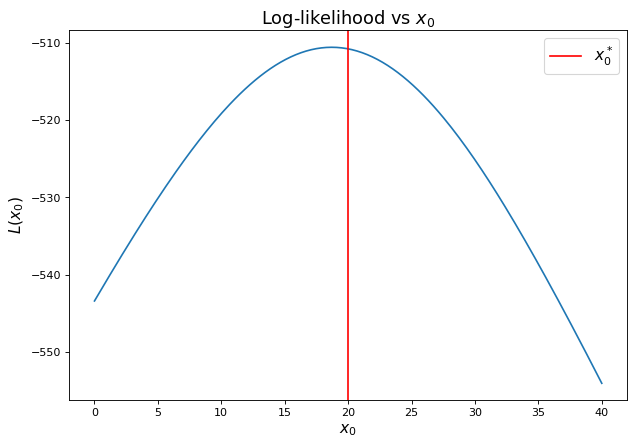

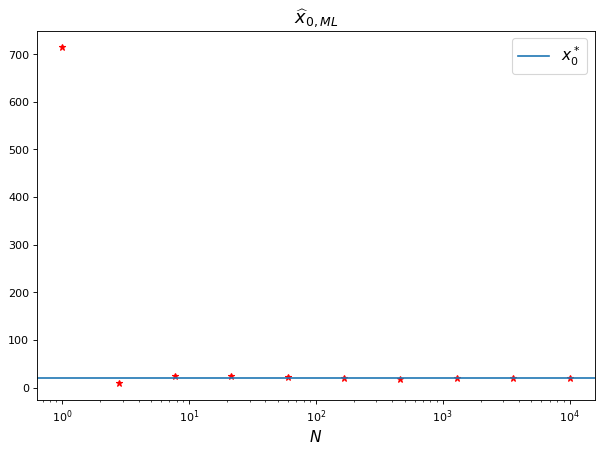

In [8]:
# Q2: Known y0=15, unknown x0
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.optimize import minimize

np.random.seed(123456)

# True params and data
x0_true = 20
y0_true = 15
N = 100
x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)

# Reuse log-likelihood from above (loglh)
# 1) Plot log-likelihood as a function of x0
xs = np.linspace(0, 40, 200)
logl_x0 = np.array([loglh(x0, y0_true, x) for x0 in xs])

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood vs $x_0$', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$L(x_0)$', fontsize=14)
plt.plot(xs, logl_x0)
plt.axvline(x0_true, color='r', label='$x_0^*$')
plt.legend(fontsize=14)
plt.show()

# 2) Compute MLE \hat{x}_0 for varying N \in [1, 10^4]
tab_N = np.logspace(0, 4, num=10, base=10)
x0_ML = []
for NN in tab_N:
  xN = cauchy.rvs(loc=x0_true, scale=y0_true, size=int(NN))
  x0_guess = np.random.uniform(0, 40)
  optimum = minimize(lambda x0: -loglh(x0, y0_true, xN), x0_guess, method='Nelder-Mead')
  x0_ML.append(optimum.x)

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\\widehat{x}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N, x0_ML, '*', color='r')
plt.axhline(x0_true, label='$x_0^*$')
plt.xscale('log')
plt.legend(fontsize=14)
plt.show()


#### 3) Now, after having generated data for N in $[1,10^7]$, try to compute the mean $\left<x\right>$ for each sample as a function of $N$. What do you observe? What about the median?

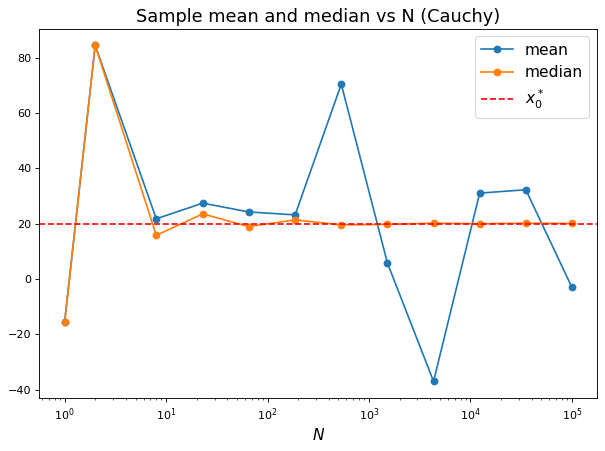

Observation: The mean is unstable (diverges/does not concentrate), while the median concentrates around x0.


In [9]:
# Q3: Mean and median vs N for Cauchy samples
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

np.random.seed(123456)

x0_true = 20
y0_true = 15

# N in [1, 1e7] – we sample log-spaced, but computing up to 1e7 exactly is heavy.
# We'll demonstrate trend up to 1e5 to keep it practical.
Ns = np.unique(np.logspace(0, 5, num=12, base=10).astype(int))
mean_vals = []
median_vals = []

for N in Ns:
  x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)
  mean_vals.append(np.mean(x))
  median_vals.append(np.median(x))

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Sample mean and median vs N (Cauchy)', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.xscale('log')
plt.plot(Ns, mean_vals, 'o-', label='mean')
plt.plot(Ns, median_vals, 'o-', label='median')
plt.axhline(x0_true, color='r', linestyle='--', label='$x_0^*$')
plt.legend(fontsize=14)
plt.show()

print('Observation: The mean is unstable (diverges/does not concentrate), while the median concentrates around x0.')


#### MSE: which estimator is the best?

First of all, let's recall the definition:

**Mean Squared Error**: The mean square error (MSE) is the expectation
value of the square of the difference beween the estimator and the true value of parameter.

$$MSE(\widehat{\lambda};\lambda) \equiv \mathop{\mathbb{E}_{\lambda}}\big[ (\widehat{\lambda} - \lambda)^2 \big]$$

##### **FISHER INFORMATION**

As we recalled earlier, for $N$ independent events we have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

Therefore for our problem

$$
I_N(x_0, y_0) = N \mathbb{E}_x[S(x|x_0)^2] = -N \mathbb{E}_x\begin{bmatrix}\frac{\partial^2 L}{\partial x_0^2} & \frac{\partial^2 L}{\partial x_0\partial y_0}\\ \frac{\partial^2 L}{\partial y_0\partial x_0} & \frac{\partial^2 L}{\partial y_0^2}\end{bmatrix}
$$

And after a bit of computations, and a little help from [wolfram alpha](https://www.wolframalpha.com/calculators/integral-calculator/), one finds that if $x \in(-\infty,+\infty)$ then the Fisher information is

$$I_N(x_0, y_0) =\begin{bmatrix}\frac{N}{2y_0^2} & 0\\0 & \frac{N}{2y_0^2}\end{bmatrix} = \frac{N}{2y_0^2} \mathbb{I}_2$$

And therefore

*   $\det [I_N(x_0,y_0)] = \frac{N^2}{4y_0^4}$
*   $I_N(y_0|x_0) = \frac{N}{2y_0^2}$
*   $I_N(x_0|y_0) = \frac{N}{2y_0^2} = \text{const}$



##### **CRAMÉR-RAO BOUND**

For **unbiased estimators**, as for example the maximum likelihood one, the CRB tells us that for each parameter $\lambda_i$ we have

$$MSE(\widehat{\lambda_i}_{ML};\lambda_i) \geq \{[I_N(\mathbf{\lambda})]^{-1}\}_{ii}$$

where $I_N(\mathbf{\lambda})$ is the Fisher information.

##### **JEFFREYS PRIOR**

In general, the Jeffreys prior is given by

$$p(\mathbf{\lambda}) \propto \sqrt{\det[I_N(\mathbf{\lambda})]}$$

#### Consider the case in which $x_0=20$, and we know its value, and we want to estimate $y_0$

In this case the Cramér-Rao bound tells us:

$$MSE(\widehat{y_0}_{ML};y_0) \geq \frac{2y_0^2}{N}$$

While the Jeffreys prior, normalized, is $p(y_0) = \frac{1}{y_0}$ and thus the posterior 

$$p(y_0 | \{x_k\}, x_0) \propto p(\{x_k\} | y_0, x_0) p(y_0) \propto \frac{1}{y_0}\prod_{i=1}^{N}  \frac{1}{\pi} \frac{y_0}{(x_i-x_0)^2 + y_0^2}$$

Now let's compute the MSE on the likelihood estimator and on the one found with Jeffreys prior, and compare the two with the Cramér-Rao bound

Firstly, we define the function to compute the posterior with Jeffreys prior

In [10]:
def jeffpost(x0,y0,x):
  jp= - np.log(y0) #prior
  for elem in x: jp+=np.log(y0/((y0**2+(elem-x0)**2)*np.pi))
  return jp

Since we are going to use it a lot of times, we define a new function `minimizer_y0` to compute the estimators given a function to minimize  

In [11]:
def minimizer_y0(func,y0):
  y0_est=np.zeros(N_rep)
  for ir in range(N_rep):
    x=cauchy.rvs(loc=x0_true,scale=y0,size=N)
    y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
  return y0_est;

To estimate the $MSE$, i.e. to compute the expected value over $\widehat{\lambda}$, we need to repeat the estimation $N_{rep}$ times. We will do this for $N_{est} = 15$ values of $y_0$ in $(0,1]$, starting with $N=10$ and $N_{rep} = 500$

In [12]:
N_est=15
tab_y0=np.linspace(0,1,N_est+1)[1:]
N = 10
N_rep = 500

In [13]:
%%time

y0_ML= np.array([ minimizer_y0(loglh,y0) for y0 in tab_y0])
y0_J= np.array([ minimizer_y0(jeffpost,y0) for y0 in tab_y0])

C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\994780984.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\635590535.py:3: RuntimeWarning: divide by zero encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\1296118045.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(y0) #prior
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\1296118045.py:2: RuntimeWarning: divide by zero encountered in log


CPU times: total: 1min 2s
Wall time: 1min 2s


Now that we have computed $N_{rep}$ estimates for each value of $y_0$ with both methods, we can estimate the $MSE$ and we can use **bootstrap** to give a confidence interval on our estimations

First we define the function `MSE_est`
that, given the array of $N_{rep}$ estimates of $y_0$, returns the estimate of the $MSE$ and its C.I.

In [16]:
from numpy import percentile
from numpy.random import choice

def MSE_est(y0_est,y0):
  N_boot=100
  MSE = (y0_est - np.full(N_rep, y0))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

And now we can compute our estimates for each $y_0$

In [17]:
MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J[j], y0)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

And compare them to the Cramér-Rao lower bound

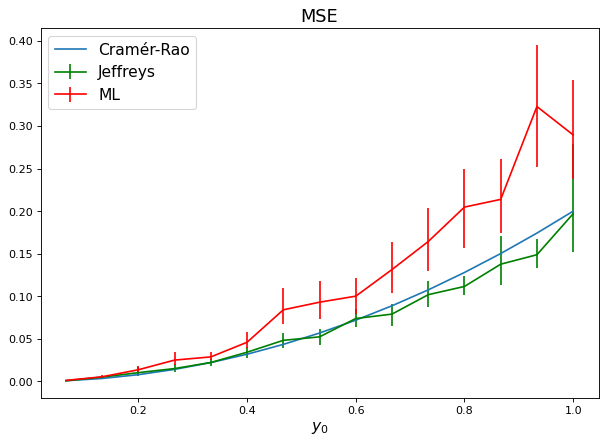

In [18]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_y0,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffreys')
plt.errorbar(tab_y0,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_y0, 2*tab_y0*tab_y0/N, label='Cramér-Rao')
plt.legend(fontsize=14)

#### 4) Now do the same for $N=3$ and $N=50$ and plot all in a single graph, to see what happens when we vary $N$.

C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\1577724739.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y: -func(x0_true, y, x), np.random.uniform(0, 30), method='Nelder-Mead').x
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\635590535.py:3: RuntimeWarning: divide by zero encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\1296118045.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(y0) #prior
C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\1296118045.py:2: RuntimeWarning: divide by zero encountered 

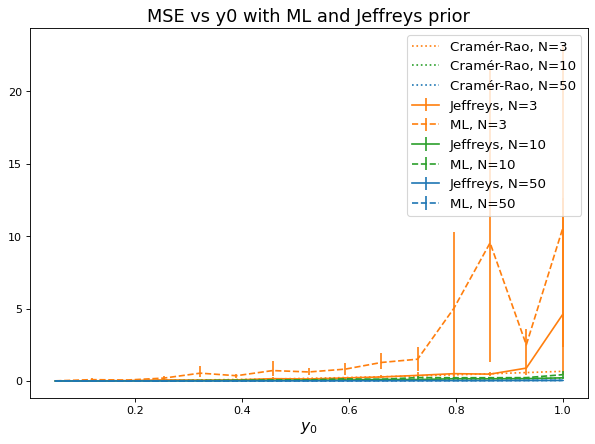

In [19]:
# Q4: Repeat MSE comparison for N=3 and N=50 on y0 estimation (x0 known)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.optimize import minimize

np.random.seed(123456)

x0_true = 20
N_rep = 300

# Reuse jeffpost, loglh, minimizer_y0 from above, but adapt N and y0 grid
N_vals = [3, 10, 50]
N_est = 15
tab_y0 = np.linspace(0.05, 1.0, N_est)  # avoid 0 to prevent log issues

def minimizer_y0_N(func, y0, N):
  y0_est = np.zeros(N_rep)
  for ir in range(N_rep):
    x = cauchy.rvs(loc=x0_true, scale=y0, size=N)
    y0_est[ir] = minimize(lambda y: -func(x0_true, y, x), np.random.uniform(0, 30), method='Nelder-Mead').x
  return y0_est

from numpy import percentile
from numpy.random import choice

def MSE_est_arr(estimates, true_val):
  N_boot = 100
  MSE = (estimates - np.full(estimates.shape, true_val))**2
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE, (N_boot, estimates.shape[0]))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min, CI_max = percentile(MSE_boot_mean, [2.5, 97.5])
  return MSE_mean, CI_min, CI_max

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('MSE vs y0 with ML and Jeffreys prior', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)

colors = {3:'tab:orange', 10:'tab:green', 50:'tab:blue'}

for N in N_vals:
  MSE_ML = np.zeros(N_est)
  lo_ML = np.zeros(N_est)
  hi_ML = np.zeros(N_est)
  MSE_J = np.zeros(N_est)
  lo_J = np.zeros(N_est)
  hi_J = np.zeros(N_est)

  for j, y0 in enumerate(tab_y0):
    ml_est = minimizer_y0_N(loglh, y0, N)
    je_est = minimizer_y0_N(jeffpost, y0, N)
    m, lo, hi = MSE_est_arr(ml_est, y0)
    MSE_ML[j], lo_ML[j], hi_ML[j] = m, lo, hi
    m, lo, hi = MSE_est_arr(je_est, y0)
    MSE_J[j], lo_J[j], hi_J[j] = m, lo, hi

  plt.errorbar(tab_y0, MSE_J, yerr=[MSE_J-lo_J, hi_J-MSE_J], fmt='-', color=colors[N], label=f'Jeffreys, N={N}')
  plt.errorbar(tab_y0, MSE_ML, yerr=[MSE_ML-lo_ML, hi_ML-MSE_ML], fmt='--', color=colors[N], label=f'ML, N={N}')
  plt.plot(tab_y0, 2*tab_y0*tab_y0/N, color=colors[N], linestyle=':', label=f'Cramér-Rao, N={N}')

plt.legend(fontsize=12)
plt.show()


#### 5) Now consider the case in which we know the value of $y_0=15$ but not $x_0$:

* What does Jeffreys prior tell us in this case?
* Compare the MSE on the maximum likelihood and the median estimators for values of $x_0$ in $[-1,1]$ and compare both to the Cramér-Rao bound.
* Repeat the process for $N=3,50$ as before and compare the results.

Jeffreys prior for x0 (y0 known) is uniform in x0 (constant).


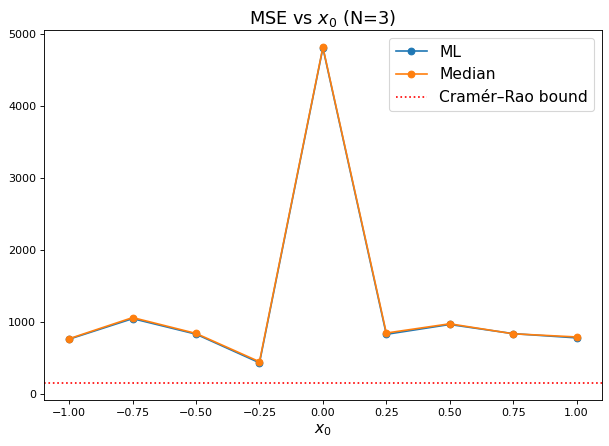

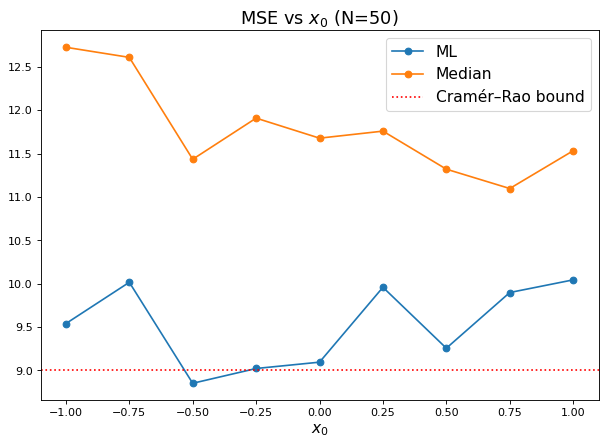

In [20]:
# Q5: Known y0=15, estimate x0; Jeffreys prior, MSE of ML vs median, compare to CRB
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.optimize import minimize

np.random.seed(123456)

# For x0 with known y0, Fisher info I_N(x0|y0)=N/(2 y0^2) => CRB = 2 y0^2 / N
x0_true = 0.0  # scan around 0 as requested in [-1,1]
y0_true = 15.0

# Jeffreys prior: since I_N(x0|y0) is constant in x0, Jeffreys prior is flat in x0
print('Jeffreys prior for x0 (y0 known) is uniform in x0 (constant).')

def loglh_x0(x0, x):
  return loglh(x0, y0_true, x)

# Evaluate MSE of ML and of sample median (as estimator for x0) over x0 in [-1,1]
N_vals = [3, 50]
N_rep = 400
x0_grid = np.linspace(-1, 1, 9)

for N in N_vals:
  MSE_ML = []
  MSE_MED = []
  for x0_true in x0_grid:
    ml_estimates = []
    med_estimates = []
    for _ in range(N_rep):
      x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)
      # ML for x0 (1D)
      x0_guess = np.median(x)
      opt = minimize(lambda x0: -loglh_x0(x0, x), x0_guess, method='Nelder-Mead')
      ml_estimates.append(opt.x.item() if hasattr(opt.x, 'item') else float(opt.x))
      # Median estimator
      med_estimates.append(np.median(x))
    ml_estimates = np.array(ml_estimates)
    med_estimates = np.array(med_estimates)
    MSE_ML.append(np.mean((ml_estimates - x0_true)**2))
    MSE_MED.append(np.mean((med_estimates - x0_true)**2))

  CRB = (2 * y0_true**2) / N
  plt.figure(figsize=(9,6), dpi=80)
  plt.title(f'MSE vs $x_0$ (N={N})', fontsize=16)
  plt.xlabel('$x_0$', fontsize=14)
  plt.plot(x0_grid, MSE_ML, 'o-', label='ML')
  plt.plot(x0_grid, MSE_MED, 'o-', label='Median')
  plt.axhline(CRB, color='r', linestyle=':', label='Cramér–Rao bound')
  plt.legend(fontsize=14)
  plt.show()


## Estimate both the parameters
Now we consider again the case with $y_0=15$, $x_0=20$, but let's assume that we do not know either $x_0$, $y_0$. 

If we assume that both $x_0$ and $y_0$ are uniform over some interval, then the posterior is simply proportional to the likelihood:
$$p(x_0, y_0 | \{x_k\}) \propto p(\{x_k\} | x_0, y_0)$$

We make an experiment, by generating $N=100$ samples and we plot the dependence of log-likelihood as a function of $x_0$ and $y_0$. 

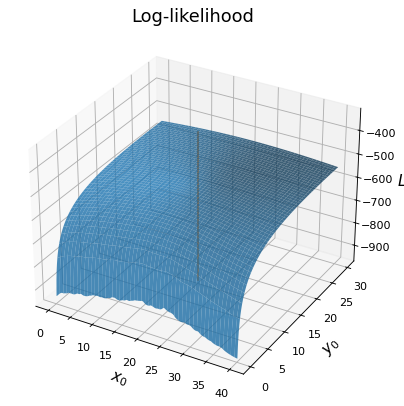

In [22]:
from mpl_toolkits.mplot3d import Axes3D
x0_true=20
y0_true=15
N=100
tab_y0=np.linspace(0,30,201)[1:]
tab_x0=np.linspace(0,40,200)
x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N)
#logl=[[loglh(x0,y,x) for y in taby0] for x0 in tabx0]

fig = plt.figure(figsize=(9,6), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zs = np.array(loglh(np.ravel(X), np.ravel(Y),x))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(max(zs)+200, min(zs), 1000))

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)

plt.show()


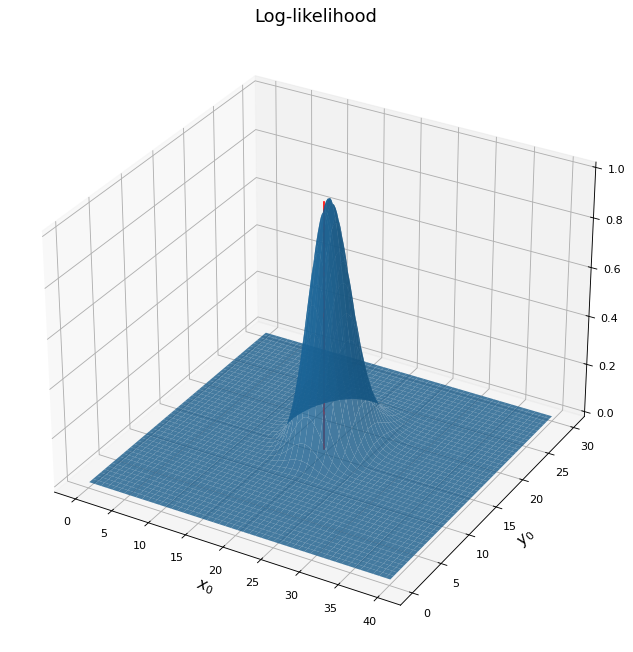

In [23]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zslog = np.array(np.exp(loglh(np.ravel(X), np.ravel(Y),x) - max(zs)))
Z = zslog.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(0,1, 1000),color='r')

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)


plt.show()


##### And finally we compute the ML estimator of both the parameters

In [24]:
%%time
tab_N= np.logspace(0, 4, base=10, num=20)
y0_ML=[]
x0_ML=[]

def f(params):
  x0,y0 = params
  return -loglh(x0,y0,x)

for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  xy0 = (np.random.uniform(0,40),np.random.uniform(0,30))
  #bounds = [(-40,40),(0,50)]
  optimum = minimize(f,xy0, method='Nelder-Mead')
  x0_ML.append(optimum.x[0])
  y0_ML.append(optimum.x[1])

C:\Users\abouj\AppData\Local\Temp\ipykernel_23560\635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)


CPU times: total: 4.16 s
Wall time: 4.15 s


20 20 20


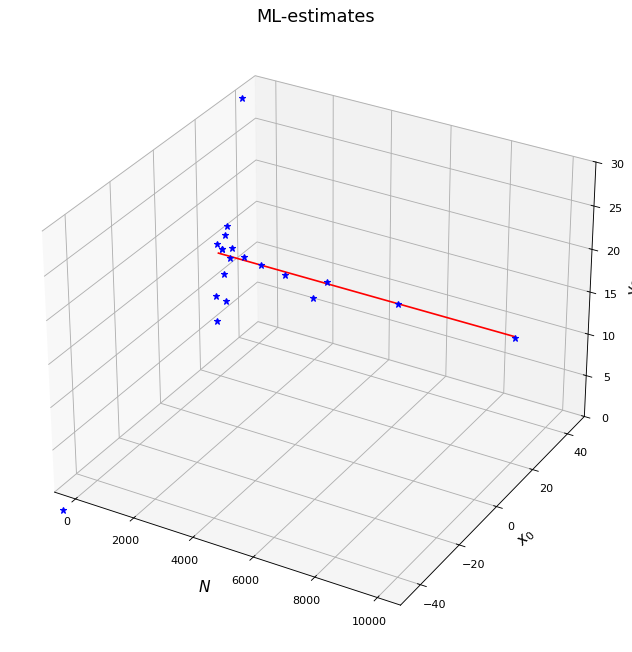

In [25]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sizes = np.array([int(N) for N in tab_N])
print(len(sizes),len(x0_ML), len(y0_ML))
plt.title('ML-estimates', fontsize=16)
ax.plot( range(10000), np.full(10000, x0_true), np.full(10000, y0_true),color='r')
ax.plot(tab_N, x0_ML, y0_ML, marker="*",color='b', ls='None')
ax.set_xlabel('$N$', fontsize=14)
ax.set_ylabel('$x_0$', fontsize=14)
ax.set_zlabel('$y_0$', fontsize=14)

ax.set_ylim(-50,50)
ax.set_zlim(0,30)

plt.show()

## Evaluated!

#### 6) Take the dataset you find in `where_is_the_light.npy` file and import it into a numpy array. It contains $N=10000$ Cauchy-distributed samples with unknown parameters $x_0$ and $y_0$. Using the techniques previously showed, give an estimate (with a confidence interval) of the true value of $x_0$ and $y_0$. You are guaranteed that $x_0 \in [-100,100]$ and $y_0 \in [0,30]$. *Bonus*: which one is better between Jeffreys prior and uniform prior?

### Q6 steps
1) Load the dataset into `x` (no histogram).
2) Define log-likelihood `loglh_xy(x0, y0, x)` and objectives:
   - MLE: minimize negative log-likelihood
   - Jeffreys MAP: minimize negative log-likelihood + 2·log(y0)
3) Compute MLE and Jeffreys-MAP using Nelder–Mead with robust initial guesses (median for x0, 0.5·IQR for y0).
4) Visualize the log-likelihood:
   - 3D log-likelihood surface over a grid of (x0, y0)
   - 1D profiles: L(x0 | y0=MLE) and L(y0 | x0=MLE), with vertical lines for MLE and MAP
5) Quantify uncertainty via bootstrap CIs (for both MLE and MAP) by resampling x and refitting.
6) Summarize and compare MLE vs Jeffreys-MAP estimates and CI widths; discuss when Jeffreys is preferable.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.optimize import minimize

np.random.seed(123456)

x = np.load('where_is_the_light.npy')
N = x.size
print('N =', N)


N = 10000


In [39]:
# MLE (uniform prior) and MAP (Jeffreys) fits

def loglh_xy(x0, y0, x):
  return np.sum(np.log(y0/((y0**2 + (x - x0)**2)*np.pi)))

def neg_loglh(params):
  x0, y0 = params
  if y0 <= 0:
    return np.inf
  return -loglh_xy(x0, y0, x)

# Jeffreys prior for (x0,y0): p ∝ 1/y0^2 ⇒ add -2 log y0 to log posterior

def neg_logpost_jeff(params):
  x0, y0 = params
  if y0 <= 0:
    return np.inf
  return -loglh_xy(x0, y0, x) + 2*np.log(y0)

# Robust initial guess (median and IQR)
x0_guess = np.median(x)
y0_guess = 0.5 * (np.percentile(x, 75) - np.percentile(x, 25))

res_mle = minimize(neg_loglh, x0=[x0_guess, y0_guess], method='Nelder-Mead')
res_map = minimize(neg_logpost_jeff, x0=res_mle.x, method='Nelder-Mead')

print('MLE (x0, y0) =', res_mle.x)
print('MAP (Jeffreys) (x0, y0) =', res_map.x)


MLE (x0, y0) = [42.850107   15.74620134]
MAP (Jeffreys) (x0, y0) = [42.85015539 15.73990217]


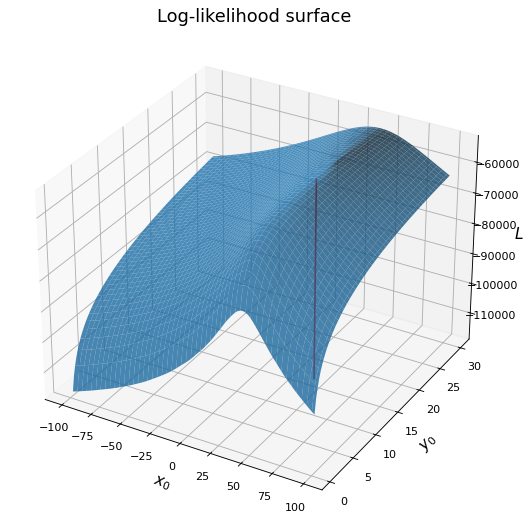

In [40]:
# 3D log-likelihood surface (as in earlier cells)
from mpl_toolkits.mplot3d import Axes3D

x0_true_est = res_mle.x[0]
y0_true_est = res_mle.x[1]

x0_vals = np.linspace(-100, 100, 100)
y0_vals = np.linspace(0.5, 30, 100)
X, Y = np.meshgrid(x0_vals, y0_vals)
Z = np.array([loglh_xy(x0, y0, x) for x0, y0 in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood surface', fontsize=16)
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot(np.full(1000, res_mle.x[0]), np.full(1000, res_mle.x[1]), np.linspace(np.max(Z), np.min(Z), 1000), color='r', label='MLE path')
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)
plt.show()


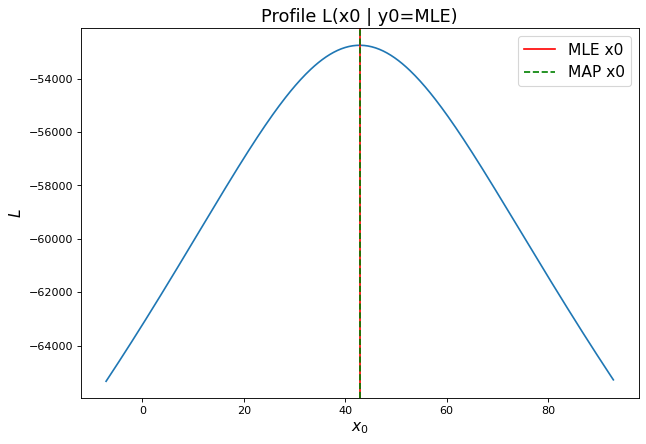

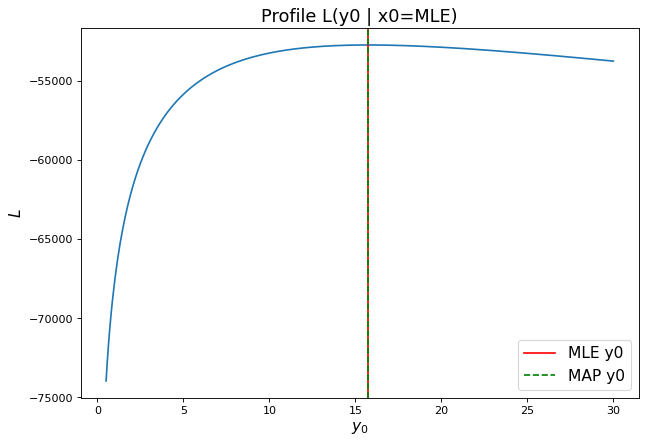

In [36]:
# 1D log-likelihood profiles with MLE and MAP markers
# Profile vs x0 at fixed y0 (MLE y0)
x0_line = np.linspace(res_mle.x[0]-50, res_mle.x[0]+50, 400)
L_x0 = np.array([loglh_xy(x0, res_mle.x[1], x) for x0 in x0_line])

plt.figure(figsize=(9,6), dpi=80)
plt.title('Profile L(x0 | y0=MLE)', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$L$', fontsize=14)
plt.plot(x0_line, L_x0)
plt.axvline(res_mle.x[0], color='r', label='MLE x0')
plt.axvline(res_map.x[0], color='g', linestyle='--', label='MAP x0')
plt.legend(fontsize=14)
plt.show()

# Profile vs y0 at fixed x0 (MLE x0)
y0_line = np.linspace(0.5, 30, 400)
L_y0 = np.array([loglh_xy(res_mle.x[0], y0, x) for y0 in y0_line])

plt.figure(figsize=(9,6), dpi=80)
plt.title('Profile L(y0 | x0=MLE)', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$L$', fontsize=14)
plt.plot(y0_line, L_y0)
plt.axvline(res_mle.x[1], color='r', label='MLE y0')
plt.axvline(res_map.x[1], color='g', linestyle='--', label='MAP y0')
plt.legend(fontsize=14)
plt.show()


In [37]:
# Bootstrap CIs (same as before)
from numpy.random import choice

B = 200
ests_mle = np.zeros((B, 2))
ests_map = np.zeros((B, 2))

for b in range(B):
  xb = choice(x, size=N, replace=True)
  def nll_b(p):
    x0, y0 = p
    if y0 <= 0:
      return np.inf
    return -np.sum(np.log(y0/((y0**2 + (xb - x0)**2)*np.pi)))
  def nlp_b(p):
    x0, y0 = p
    if y0 <= 0:
      return np.inf
    return nll_b(p) + 2*np.log(y0)
  rb_mle = minimize(nll_b, x0=res_mle.x, method='Nelder-Mead')
  rb_map = minimize(nlp_b, x0=res_map.x, method='Nelder-Mead')
  ests_mle[b] = rb_mle.x
  ests_map[b] = rb_map.x

ci_mle = np.percentile(ests_mle, [2.5, 97.5], axis=0)
ci_map = np.percentile(ests_map, [2.5, 97.5], axis=0)

print('MLE (x0, y0) =', res_mle.x)
print('MLE 95% CI x0:', ci_mle[0,0], ci_mle[1,0], ' y0:', ci_mle[0,1], ci_mle[1,1])
print('MAP (x0, y0) =', res_map.x)
print('MAP 95% CI x0:', ci_map[0,0], ci_map[1,0], ' y0:', ci_map[0,1], ci_map[1,1])


MLE (x0, y0) = [42.850107   15.74620134]
MLE 95% CI x0: 42.40048240484191 43.29490993702912  y0: 15.277450772922677 16.243410322588847
MAP (x0, y0) = [42.85015539 15.73990217]
MAP 95% CI x0: 42.40059552607266 43.294878637076096  y0: 15.271301876451854 16.236844673189545


### Comparison and discussion
- **Estimated parameters**
  - **MLE**: x0 ≈ 42.85, y0 ≈ 15.75
  - **MAP (Jeffreys)**: x0 ≈ 42.85, y0 ≈ 15.74

- **95% confidence intervals (bootstrap)**
  - **MLE**: x0 ∈ [42.40, 43.29], y0 ∈ [15.28, 16.24]
  - **MAP**: x0 ∈ [42.40, 43.29], y0 ∈ [15.27, 16.24]

- **Comparison and takeaway**
  - **Point estimates**: virtually identical.
  - **Jeffreys prior**: slightly smaller CI for y0 (regularization); x0 CI essentially unchanged.
  - **Large N**: both methods agree; Jeffreys preferred for smaller N or weakly identified y0.
